Oleh: Broyden 1

---



# 📚 **Import Libraries**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# **1. | Problem Scoping ❓**



🚀👫 **Detail Project**

Project ini menggunakan data Indeks Pembangunan Manusia yang bertujuan untuk memprediksi status IPM seseorang berdasarkan harapan lama sekolah, pengeluaran perkapita, rerata lama sekolah, dan usia harapan hidup. Dengan diketahuinya IPM maka dapat dimanfaatkan oleh pemerintah sebagai bahan pertimbangan dalam mengambil kebijakan.




❓ **Rumusan Masalah** 

Rumusan masalah yang akan diselesaikan pada project ini sebagai berikut.
1. Bagaimana persebaran dari setiap variabel?
2. Apakah terdapat korelasi atau hubungan antara variabel dependent dan independen?
3. Mana model yang paling baik dan berapa skor akurasinya?

# **2. | Data Acquisition** 🔎

In [26]:
path = "/content/IPM.xlsx"
df = pd.read_excel(path)

df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [27]:
print("Dimensi Data:")
print("Total Baris: ", df.shape[0])
print("Total Kolom: ", df.shape[1])

print("\n","*" * 50, "\n")

print("Informasi Dataset:")
df.info()



Dimensi Data:
Total Baris:  2196
Total Kolom:  5

 ************************************************** 

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


👉 Pada dataset terdapat 2196 baris dan 5 kolom. Detail informasi setiap variabel dapat terlihat di atas.

👉 Tipe data tiap atribut sudah sesuai.
*   4 variabel numerik
*   1 variabel kategorik (atribut: IPM)

👉 Variabel IPM sebagai data target.

# **3. | Exploratory Data** 📈 

## **3.1. | Check Missing Value**

In [28]:
df.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

👉 Pada dataset tidak terdapat missing value.

## **3.2. | Statistic Descriptive**
👉 Statistik deskriptif untuk kolom numerik

In [29]:
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Harapan_Lama_Sekolah,2196.0,12.931498,1.312967,2.95,12.35,12.860,13.5700,17.80
Pengeluaran_Perkapita,2196.0,10323.144353,2664.738311,3975.00,8599.75,10192.500,11670.5000,23888.00
Rerata_Lama_Sekolah,2196.0,8.291585,1.611256,0.85,7.39,8.180,9.1800,12.83
Usia_Harapan_Hidup,2196.0,69.467418,3.437536,54.82,67.21,69.785,71.7125,77.73


## **3.3. | Data Distribution**

### 3.3.1. | Harapan Lama Sekolah

.: Harapan Lama Sekolah Column Skewness & Kurtosis :.
****************************************
Skewness: -1.465
Kurtosis: 10.309




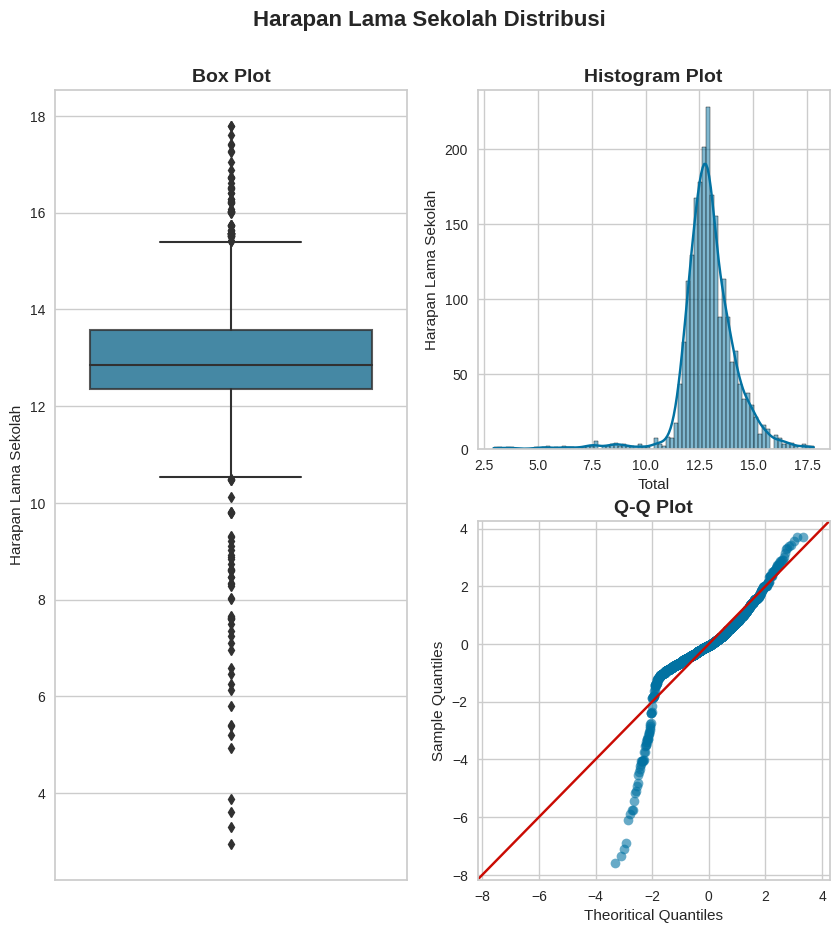

In [30]:
# --- Variable, Color & Plot Size ---
var = 'Harapan_Lama_Sekolah'
fig=plt.figure(figsize=(10, 10))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Harapan Lama Sekolah Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Harapan Lama Sekolah Distribusi', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Harapan Lama Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Harapan Lama Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

👉 Berdasarkan boxplot, dataset memiliki banyak **outliers** baik dibagian atas maupun bawah boxplot.

👉 Berdasarkan histogram, kolom ini termasuk **highly left skewed**. Dibuktikan juga dengan **nilai skewness (-1.465**) dari kolom.

👉 Nilai **kurtosis kolom ini 10.309**. Artinya kolom ini termasuk **leptokurtic**.

👉 Berdasarkan QQ-Plot, data menjauh dari 45 derajat di bagian bawah. Artinya data cenderung **highly left skewed**.



### 3.3.2. | Pengeluaran Perkapita

.: Pengeluaran Perkapita Column Skewness & Kurtosis :.
****************************************
Skewness: 0.751
Kurtosis: 1.773




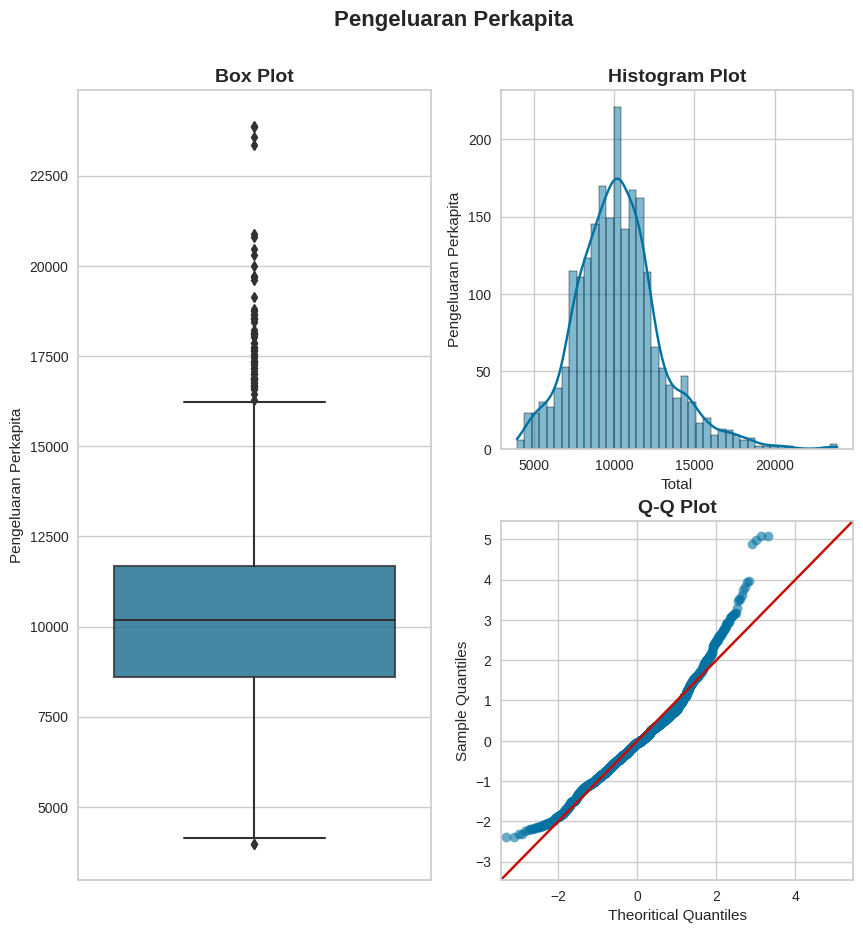

In [31]:
# --- Variable, Color & Plot Size ---
var = 'Pengeluaran_Perkapita'
fig=plt.figure(figsize=(10, 10))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Pengeluaran Perkapita Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Pengeluaran Perkapita', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Pengeluaran Perkapita', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Pengeluaran Perkapita', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

👉 Berdasarkan boxplot, dataset memiliki **outliers** baik dibagian atas maupun bawah boxplot. Terutama, dibagian atas boxplot.

👉 Berdasarkan histogram, kolom ini termasuk **moderately right skewed**. Dibuktikan juga dengan **nilai skewness (0.751**) dari kolom.

👉 Nilai **kurtosis kolom ini 1.773**. Artinya kolom ini termasuk **platikurtic**.

👉 Berdasarkan QQ-Plot, data cenderung menjauh dari 45 derajat di bagian atas. Artinya data cenderung **moderately right skewed**.


### 3.3.3. | Rerata Lama Sekolah

.: Rerata Lama Sekolah Column Skewness & Kurtosis :.
****************************************
Skewness: -0.386
Kurtosis: 1.729




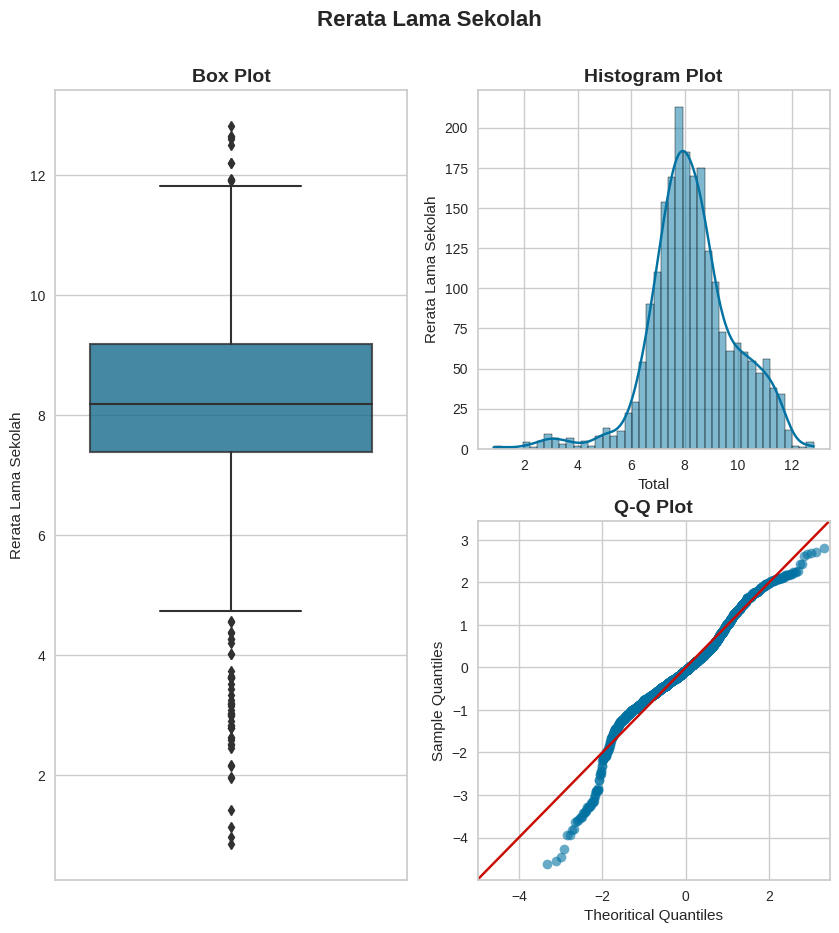

In [32]:
# --- Variable, Color & Plot Size ---
var = 'Rerata_Lama_Sekolah'
fig=plt.figure(figsize=(10, 10))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Rerata Lama Sekolah Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Rerata Lama Sekolah', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Rerata Lama Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Rerata Lama Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

👉 Berdasarkan boxplot, dataset memiliki **outliers** baik dibagian atas maupun bawah boxplot. Terutama, dibagian bawah boxplot.

👉 Berdasarkan histogram, kolom ini termasuk **approximately symmetric**. Dibuktikan juga dengan **nilai skewness (-0.386)** dari kolom.

👉 Nilai **kurtosis kolom ini 1.729**. Artinya kolom ini termasuk **platikurtic**.


### 3.3.4. | Usia Harapan Hidup

.: Usia Harapan Hidup Column Skewness & Kurtosis :.
****************************************
Skewness: -0.485
Kurtosis: 0.686




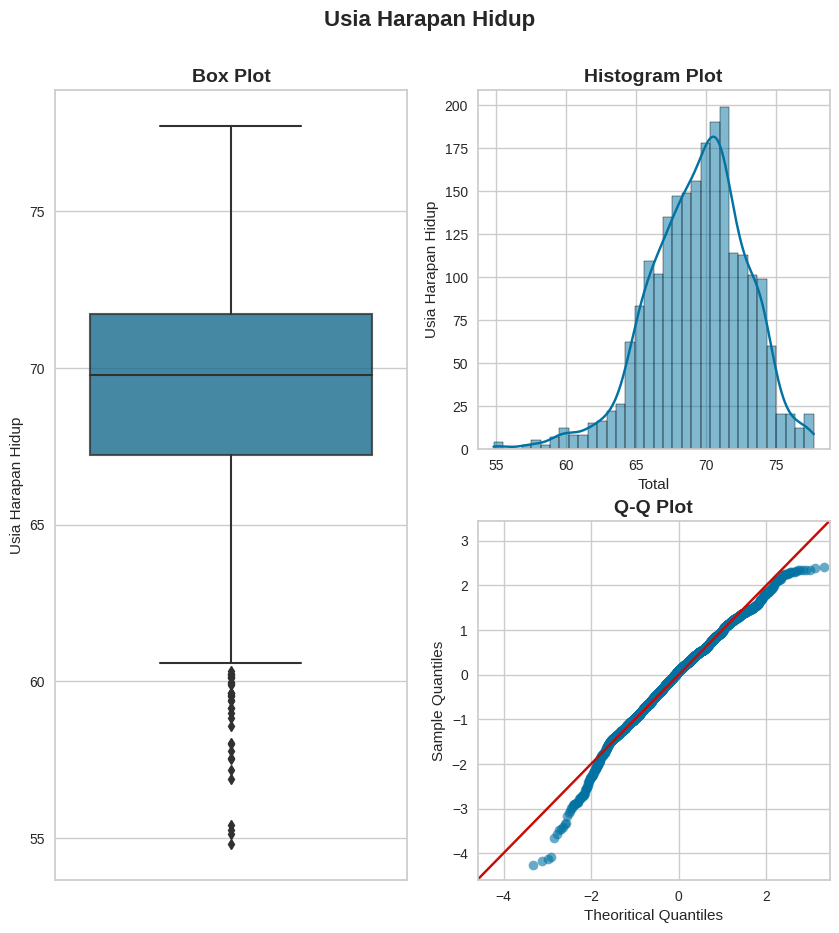

In [33]:
# --- Variable, Color & Plot Size ---
var = 'Usia_Harapan_Hidup'
fig=plt.figure(figsize=(10, 10))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Usia Harapan Hidup Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Usia Harapan Hidup', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Usia Harapan Hidup', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Usia Harapan Hidup', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

👉 Berdasarkan boxplot, dataset memiliki **outliers** di bagian bawah boxplot.

👉 Berdasarkan histogram, kolom ini termasuk **approximately symmetric**. Dibuktikan juga dengan **nilai skewness (-0.485)** dari kolom.

👉 Nilai **kurtosis kolom ini 0.686**. Artinya kolom ini termasuk **platikurtic**.


### 3.3.5. | IPM (data target)

*********************************************
.: Distribusi Indeks Pembangunan Manusia (IPM) Total :.
*********************************************


Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

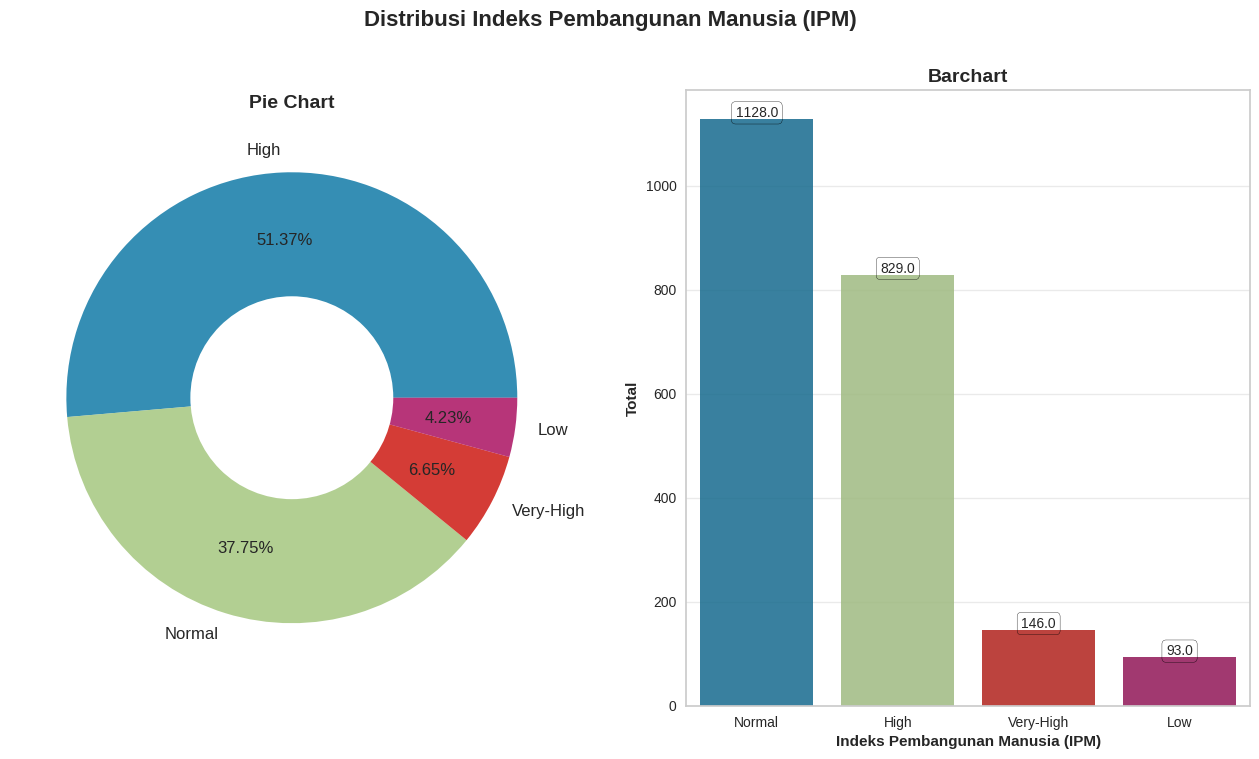

In [34]:
# --- Setting Colors, Labels, Order ---
labels=df.IPM.unique()
order=df['IPM'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Distribusi Indeks Pembangunan Manusia (IPM)', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['IPM'].value_counts(), labels=labels, wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Barchart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='IPM', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Indeks Pembangunan Manusia (IPM)', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Distribusi Indeks Pembangunan Manusia (IPM) Total :.'+'\033[0m')
print('*' * 45)
df.IPM.value_counts(dropna=False)

👉 Jumlah data dengan IPM paling sedikit adalah Very-High dan Low hanya sebayak 6.65% dan 4.23% dari total keseluruhan data.

👉 Jumlah data IPM normal terbanyak di antara lainnya.

## **3.4. | Data Visualization**

### 3.4.1. | IPM Based on Harapan Lama Sekolah

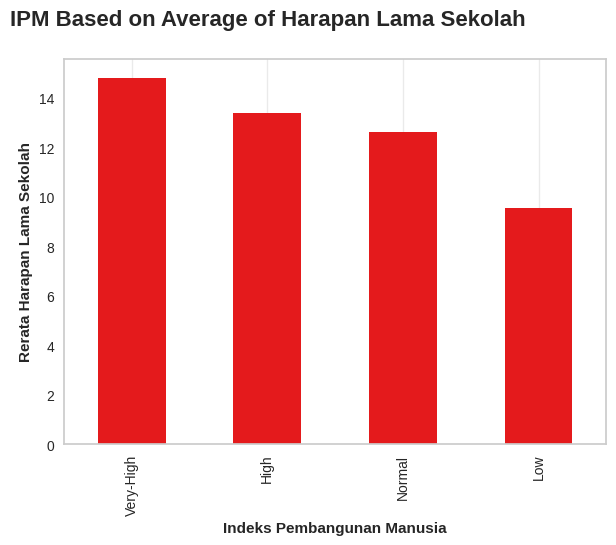

In [35]:
# --- Labels Settings ---
labels = df.IPM.unique()

plt.figure(figsize=(7,5))
plt.suptitle('IPM Based on Average of Harapan Lama Sekolah', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

df.groupby('IPM')['Harapan_Lama_Sekolah'].mean().sort_values(ascending=False).plot(kind='bar', cmap='Set1')

plt.xlabel('Indeks Pembangunan Manusia', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Rerata Harapan Lama Sekolah', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)

👉 Berdasarkan bar chart di atas, semakin **tinggi indeks pembangunan manusia** maka rerata **harapan lama sekolahnya semakin tinggi** juga.

### 3.4.2. | IPM Distribution Based on Pengeluaran Perkapita

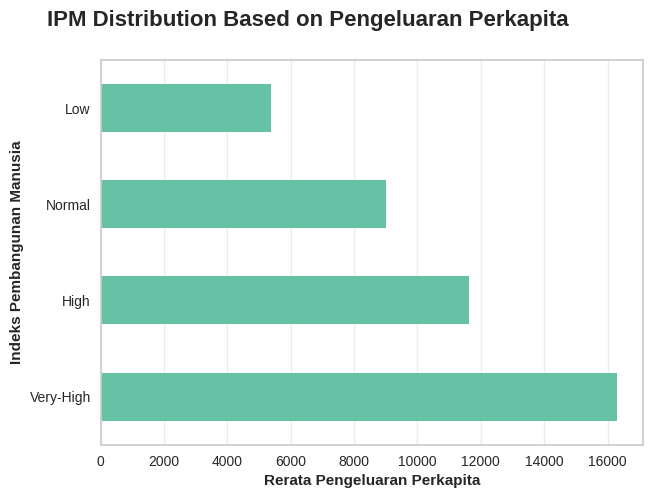

In [36]:
# --- Labels Settings ---
labels = df.IPM.unique()

plt.figure(figsize=(7,5))
plt.suptitle('IPM Distribution Based on Pengeluaran Perkapita', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

df.groupby('IPM')['Pengeluaran_Perkapita'].mean().sort_values(ascending=False).plot(kind='barh', cmap='Set2')

plt.xlabel('Rerata Pengeluaran Perkapita', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Indeks Pembangunan Manusia', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)

👉 Berdasarkan horizontal bar chart di atas, semakin **tinggi indeks pembangunan manusia** maka rerata **pengeluaran per kapita juga semakin besar**.

### 3.4.3. | IPM Distribution Based on Rerata Lama Sekolah

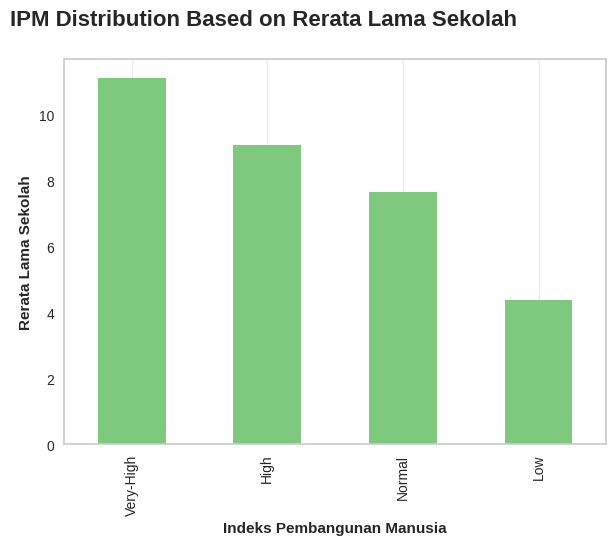

In [37]:
# --- Labels Settings ---
labels = df.IPM.unique()

plt.figure(figsize=(7,5))
plt.suptitle('IPM Distribution Based on Rerata Lama Sekolah', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

df.groupby('IPM')['Rerata_Lama_Sekolah'].mean().sort_values(ascending=False).plot(kind='bar', cmap='Accent')

plt.xlabel('Indeks Pembangunan Manusia', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Rerata Lama Sekolah', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)

👉 Berdasarkan bar chart di atas, semakin **tinggi indeks pembangunan manusia** maka rerata **pengeluaran per kapita juga semakin besar**.

👉 Adanya perbedaan yang **cukup signifikan** rerata lama sekolah untuk setiap status IPM-nya.

### 3.4.4. | IPM Distribution Based on Usia Harapan Hidup

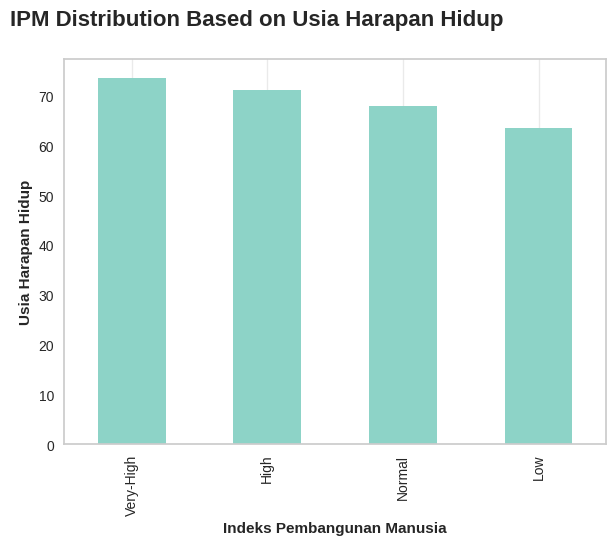

In [38]:
# --- Labels Settings ---
labels = df.IPM.unique()

plt.figure(figsize=(7,5))
plt.suptitle('IPM Distribution Based on Usia Harapan Hidup', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

df.groupby('IPM')['Usia_Harapan_Hidup'].mean().sort_values(ascending=False).plot(kind='bar', cmap='Set3')

plt.xlabel('Indeks Pembangunan Manusia', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Usia Harapan Hidup', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)

👉 Tidak ada perbedaan yang **cukup signifikan** rerata usia harapan hidup untuk setiap status IPM-nya. Artinya, usia harapan hidup **tidak terlalu berpengaruh** terhadap IPM.

### 3.4.5. | Heatmap Correlation

<ipython-input-39-2c627299e70e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)


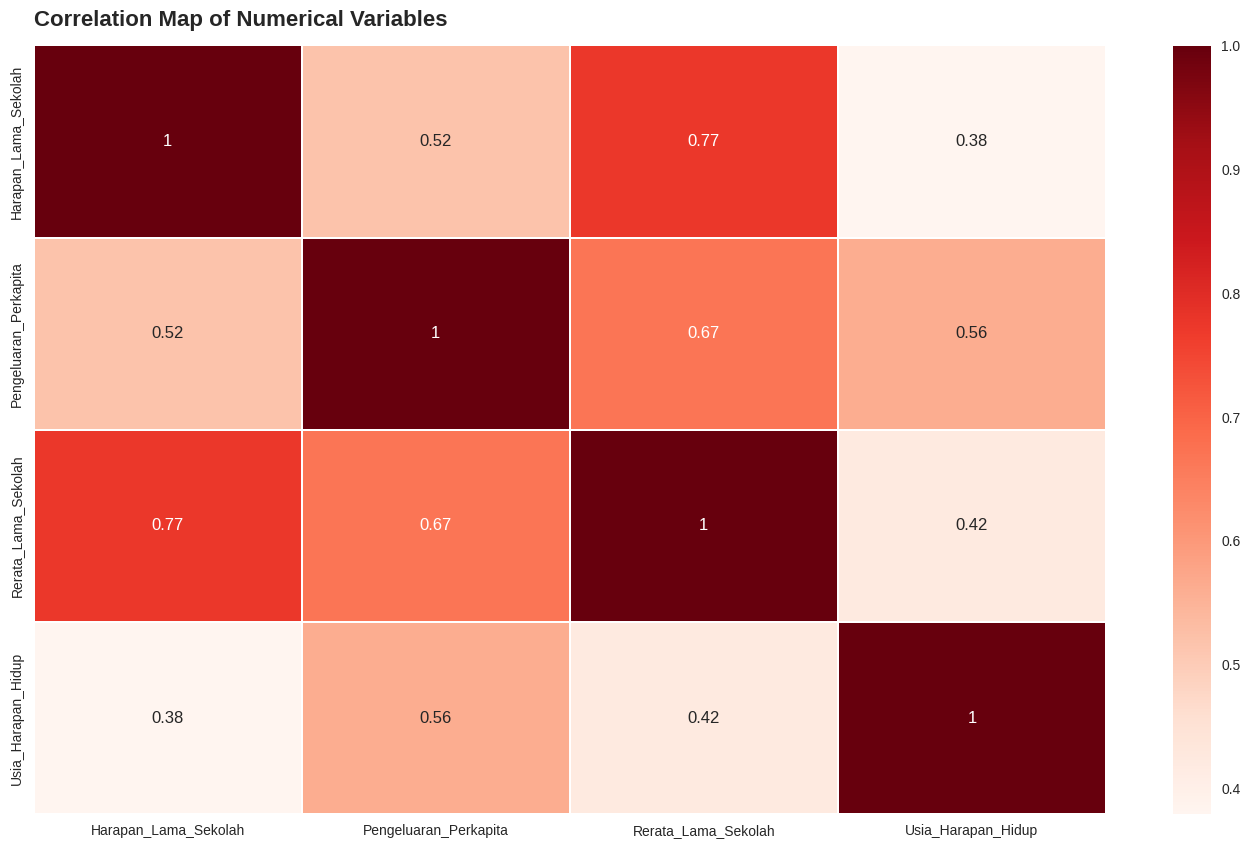

In [39]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

## **3.5. | Data Preprocessing**

### 3.5.1. | Convert Data Target to Numeric

In [40]:
df['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

In [41]:
df['IPM'].replace(['Low', 'Normal', 'High', 'Very-High'],
                        [0, 1, 2, 3], inplace=True)

In [42]:
df['IPM'].unique()

array([2, 1, 3, 0])

### 3.5.2. | Heatmap Correlation (+Target)

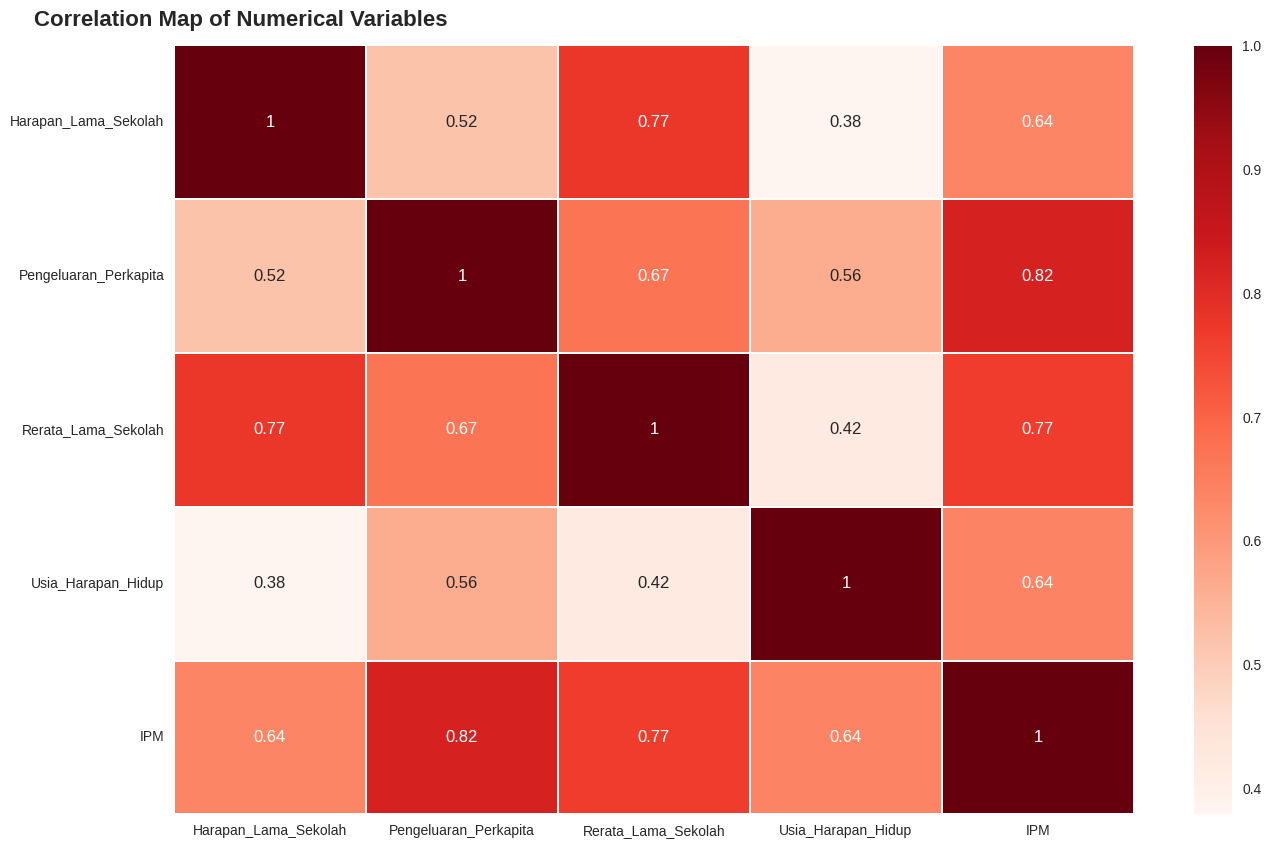

In [43]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

👉 Berdasarkan heatmap, diperoleh variabel `Pengeluaran_Perkapita` dan `Rerata_Lama_Sekolah` cukup **berkorelasi secara positif** dengan IPM.



### 3.5.3 | Check Duplicate Value

In [44]:
print("Jumlah data yang duplikat: ", str(df.duplicated().sum()))

Jumlah data yang duplikat:  0


### 3.5.4. | Split Data X and y

In [45]:
X = df.drop(['IPM'], axis=1)
y = df['IPM']

### 3.5.5. | Split Data Training and Testing

In [48]:
X_test, X_train, y_test, y_train = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

🎯 Data sudah siap untuk dilatih

# **4. | Modelling** 🔮

## 4.1. | Decision Tree

In [49]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42)
dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9954545454545455, 0.9253986332574032)

In [50]:
# Predict
y_pred_dt = dt.predict(X_test)

.:. Decision Tree Accuracy: 92.54% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        74
           1       0.96      0.94      0.95       902
           2       0.89      0.93      0.91       663
           3       0.87      0.83      0.85       117

    accuracy                           0.93      1756
   macro avg       0.91      0.90      0.90      1756
weighted avg       0.93      0.93      0.93      1756


.: Performance Evaluation
**************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


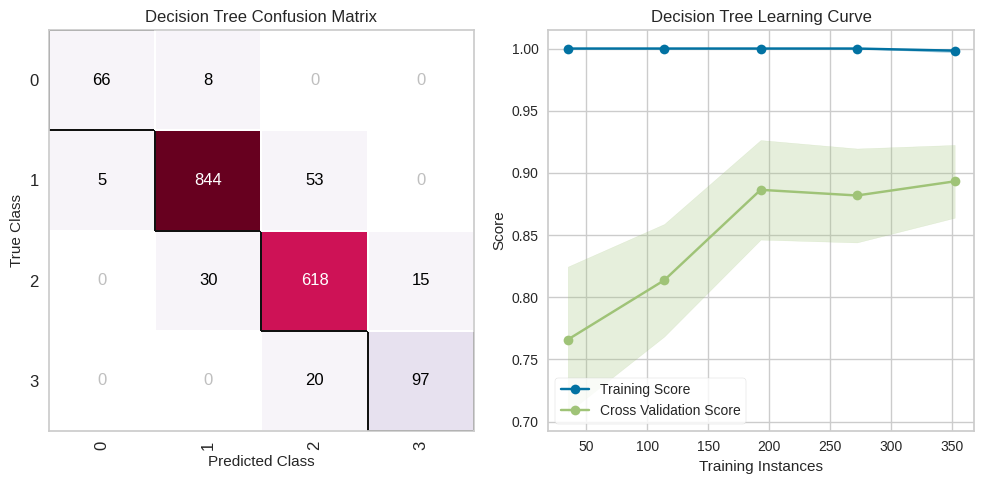

In [51]:
# --- DT Accuracy ---
DTAcc = accuracy_score(y_pred_dt, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTAcc*100)+' .:.')

# --- DT Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_dt))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- DT Confusion Matrix ---
logmatrix = ConfusionMatrix(dt, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- DT Learning Curve ---
loglc = LearningCurve(dt, ax=ax2, title='Decision Tree Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

## 4.2. | Random Forest

In [52]:
rf = RandomForestClassifier(criterion='gini', max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.9561503416856492)

In [53]:
# Predict
y_pred_rf = rf.predict(X_test)

.:. Random Forest Accuracy: 95.62% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        74
           1       0.96      0.97      0.97       902
           2       0.95      0.95      0.95       663
           3       0.94      0.86      0.90       117

    accuracy                           0.96      1756
   macro avg       0.95      0.92      0.94      1756
weighted avg       0.96      0.96      0.96      1756


.: Performance Evaluation
**************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


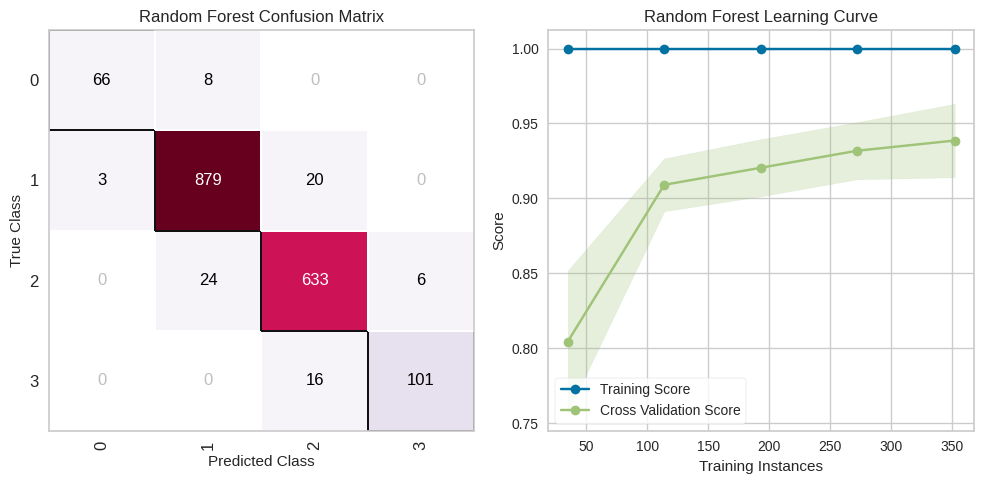

In [54]:
# --- RF Accuracy ---
RFAcc = accuracy_score(y_pred_rf, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- RF Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_rf))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- RF Confusion Matrix ---
logmatrix = ConfusionMatrix(rf, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- RF Learning Curve ---
loglc = LearningCurve(rf, ax=ax2, title='Random Forest Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

## 4.3. | Adaboost

In [55]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42)
adb = AdaBoostClassifier(dt, n_estimators=100, random_state=42)
adb.fit(X_train, y_train)
adb.score(X_train, y_train), adb.score(X_test, y_test)

(1.0, 0.9305239179954442)

In [56]:
# Predict
y_pred_adb = adb.predict(X_test)

.:. Adaboost Accuracy: 93.05% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        74
           1       0.96      0.94      0.95       902
           2       0.92      0.93      0.92       663
           3       0.86      0.86      0.86       117

    accuracy                           0.93      1756
   macro avg       0.90      0.91      0.90      1756
weighted avg       0.93      0.93      0.93      1756


.: Performance Evaluation
**************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


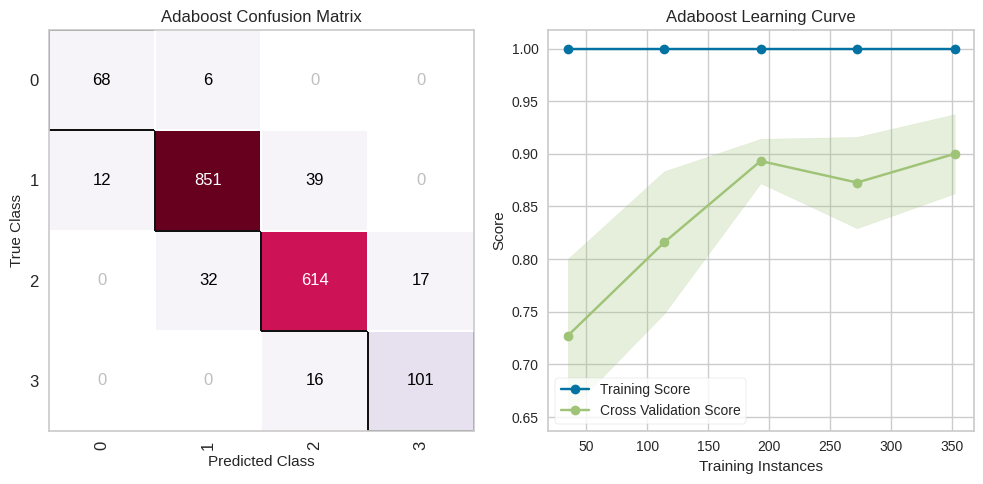

In [57]:
# --- ADB Accuracy ---
ADBAcc = accuracy_score(y_pred_adb, y_test)
print('.:. Adaboost Accuracy:'+'\033[1m {:.2f}%'.format(ADBAcc*100)+' .:.')

# --- ADB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_adb))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- ADB Confusion Matrix ---
logmatrix = ConfusionMatrix(adb, ax=ax1, cmap='PuRd',
                            title='Adaboost Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- ADB Learning Curve ---
loglc = LearningCurve(adb, ax=ax2, title='Adaboost Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

## 4.4. | XGBoost

In [58]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(1.0, 0.9515945330296127)

In [59]:
# Predict
y_pred_xgb = xgb.predict(X_test)

.:. XGBoost Accuracy: 95.16% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        74
           1       0.97      0.96      0.97       902
           2       0.94      0.95      0.94       663
           3       0.90      0.91      0.90       117

    accuracy                           0.95      1756
   macro avg       0.94      0.93      0.94      1756
weighted avg       0.95      0.95      0.95      1756


.: Performance Evaluation
**************************


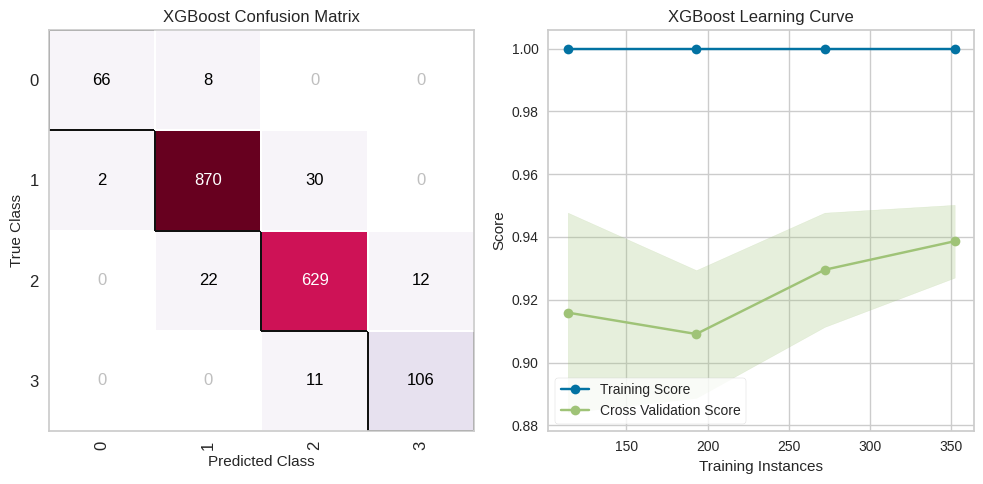

In [60]:
# --- XGB Accuracy ---
XGBAcc = accuracy_score(y_pred_xgb, y_test)
print('.:. XGBoost Accuracy:'+'\033[1m {:.2f}%'.format(XGBAcc*100)+' .:.')

# --- XGB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_xgb))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- XGB Confusion Matrix ---
logmatrix = ConfusionMatrix(xgb, ax=ax1, cmap='PuRd',
                            title='XGBoost Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- XGB Learning Curve ---
loglc = LearningCurve(xgb, ax=ax2, title='XGBoost Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

## 4.5. | Stacking
with KNN, Naive Bayes, SVM as base learner and Logistic Regression as Final

In [61]:
estimators = [
  ('clf1' , KNeighborsClassifier()),
  ('clf2' , GaussianNB()),
  ('clf3' , SVC())
]

sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))
sc.fit(X_train, y_train)
sc.score(X_train, y_train), sc.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9568181818181818, 0.9521640091116174)

In [62]:
# Predict
y_pred_sc = sc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


.:. Stackingoost Accuracy: 95.22% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        74
           1       0.97      0.97      0.97       902
           2       0.94      0.95      0.94       663
           3       0.90      0.88      0.89       117

    accuracy                           0.95      1756
   macro avg       0.95      0.92      0.94      1756
weighted avg       0.95      0.95      0.95      1756


.: Performance Evaluation
**************************


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

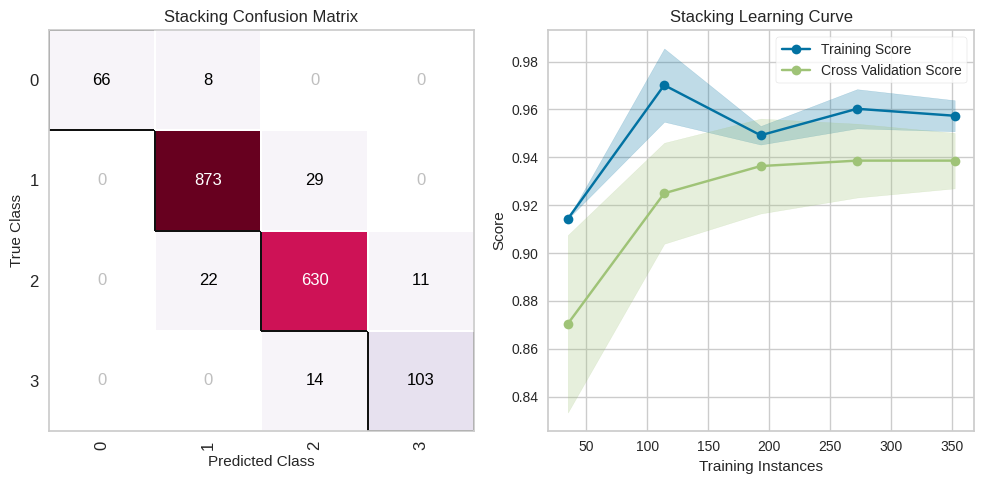

In [63]:
# --- Stacking Accuracy ---
StackingAcc = accuracy_score(y_pred_sc, y_test)
print('.:. Stackingoost Accuracy:'+'\033[1m {:.2f}%'.format(StackingAcc*100)+' .:.')

# --- Stacking Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_sc))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Stacking Confusion Matrix ---
logmatrix = ConfusionMatrix(sc, ax=ax1, cmap='PuRd',
                            title='Stacking Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- Stacking Learning Curve ---
loglc = LearningCurve(sc, ax=ax2, title='Stacking Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

# **5. | Evaluation 📑**


💭 Setelah melatih dan prediksi **5 model**, dilakukan **perbandingan akurasi** tiap modelnya sehingga dapat diketahui best model

In [64]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'Stacking'], 
                        'Accuracy': [DTAcc*100, RFAcc*100, ADBAcc*100, XGBAcc*100, StackingAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

<ipython-input-64-04469561d011>:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
Random Forest,95.615034
Stacking,95.216401
XGBoost,95.159453
Adaboost,93.052392
Decision Tree,92.539863


👉 Berdasarkan hasil diperoleh bahwa model dengan teknik **Random Forest** dengan KNN, Naive Bayes, SVM sebagai estimator dan  Logistic Regression sebagai final estimator memiliki akurasi tertinggi, yakni sebesar **95.61%**.

# **6. | Save Model**
Hanya menyimpan model dengan hasil akurasi terbaik untuk selanjutnya dilakukan proses deployment

In [66]:
import joblib
joblib.dump((rf), "model_ipm_rf.model")

['model_ipm_rf.model']

# **7. | Interpretation** ✨

Kesimpulan dari insight yang diperoleh sebagai berikut.
1. Persebaran data dari setiap variabel cenderung tidak terdistribusi normal, dimana ada variabel yang condong ke kanan ataupun kiri.
2. Variabel `Pengeluaran_Perkapita` dan `Rerata_Lama_Sekolah` cukup berkorelasi secara positif dengan IPM. Artinya, semakin besar pengeluaran per kapita maka semakin tinggi IPM-nya. Serta, semakin lama sekolah maka semakin tinggi tingkat IPM-nya.
3. Model **random forest** merupakan model dengan akurasi paling tinggi sebesar 95.61%.
